# Kullback-Leibler (KL) Divergence

## 1. Definition
The Kullback-Leibler divergence (also called relative entropy) measures the difference between two probability distributions P and Q. For discrete probability distributions, it is defined as:

$$D_{KL}(P||Q) = \sum_{x} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$

For continuous distributions:

$$D_{KL}(P||Q) = \int_{-\infty}^{\infty} p(x) \log\left(\frac{p(x)}{q(x)}\right)dx$$

## 2. Properties

1. $D_{KL}(P||Q) \geq 0$ (Non-negative)
2. $D_{KL}(P||Q) = 0$ if and only if P = Q
3. Not symmetric: $D_{KL}(P||Q) \neq D_{KL}(Q||P)$
4. Not a true distance metric (doesn't satisfy triangle inequality)

## 3. Common Applications

The following formula is further explained below.

For Normal distributions P and Q with means $\mu_1$, $\mu_2$ and standard deviations $\sigma_1$, $\sigma_2$:

$$D_{KL}(P||Q) = \log\left(\frac{\sigma_2}{\sigma_1}\right) + \frac{\sigma_1^2 + (\mu_1-\mu_2)^2}{2\sigma_2^2} - \frac{1}{2}$$

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.special import rel_entr
import seaborn as sns

In [2]:
def kl_divergence_normal(mu1, sigma1, mu2, sigma2):
    """
    Compute KL divergence between two normal distributions
    """
    return np.log(sigma2/sigma1) + (sigma1**2 + (mu1-mu2)**2)/(2*sigma2**2) - 0.5

In [3]:
def plot_distributions_and_kl():
    # Create sample space
    x = np.linspace(-5, 5, 1000)
    
    # Define different distributions
    distributions = [
        {'mu1': 0, 'sigma1': 1, 'mu2': 0, 'sigma2': 2},  # Same mean, different variance
        {'mu1': 0, 'sigma1': 1, 'mu2': 2, 'sigma2': 1},  # Different mean, same variance
        {'mu1': 0, 'sigma1': 1, 'mu2': 2, 'sigma2': 1.5}  # Different mean and variance
    ]
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    for idx, dist in enumerate(distributions):
        # Calculate distributions
        p = norm.pdf(x, dist['mu1'], dist['sigma1'])
        q = norm.pdf(x, dist['mu2'], dist['sigma2'])
        
        # Calculate KL divergence
        kl = kl_divergence_normal(dist['mu1'], dist['sigma1'], 
                                dist['mu2'], dist['sigma2'])
        
        # Plot
        axes[idx].plot(x, p, 'b-', label='P (Reference)')
        axes[idx].plot(x, q, 'r--', label='Q (Approximation)')
        axes[idx].set_title(f'KL(P||Q) = {kl:.3f}\n' + 
                          f'μ1={dist["mu1"]}, σ1={dist["sigma1"]}, ' +
                          f'μ2={dist["mu2"]}, σ2={dist["sigma2"]}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

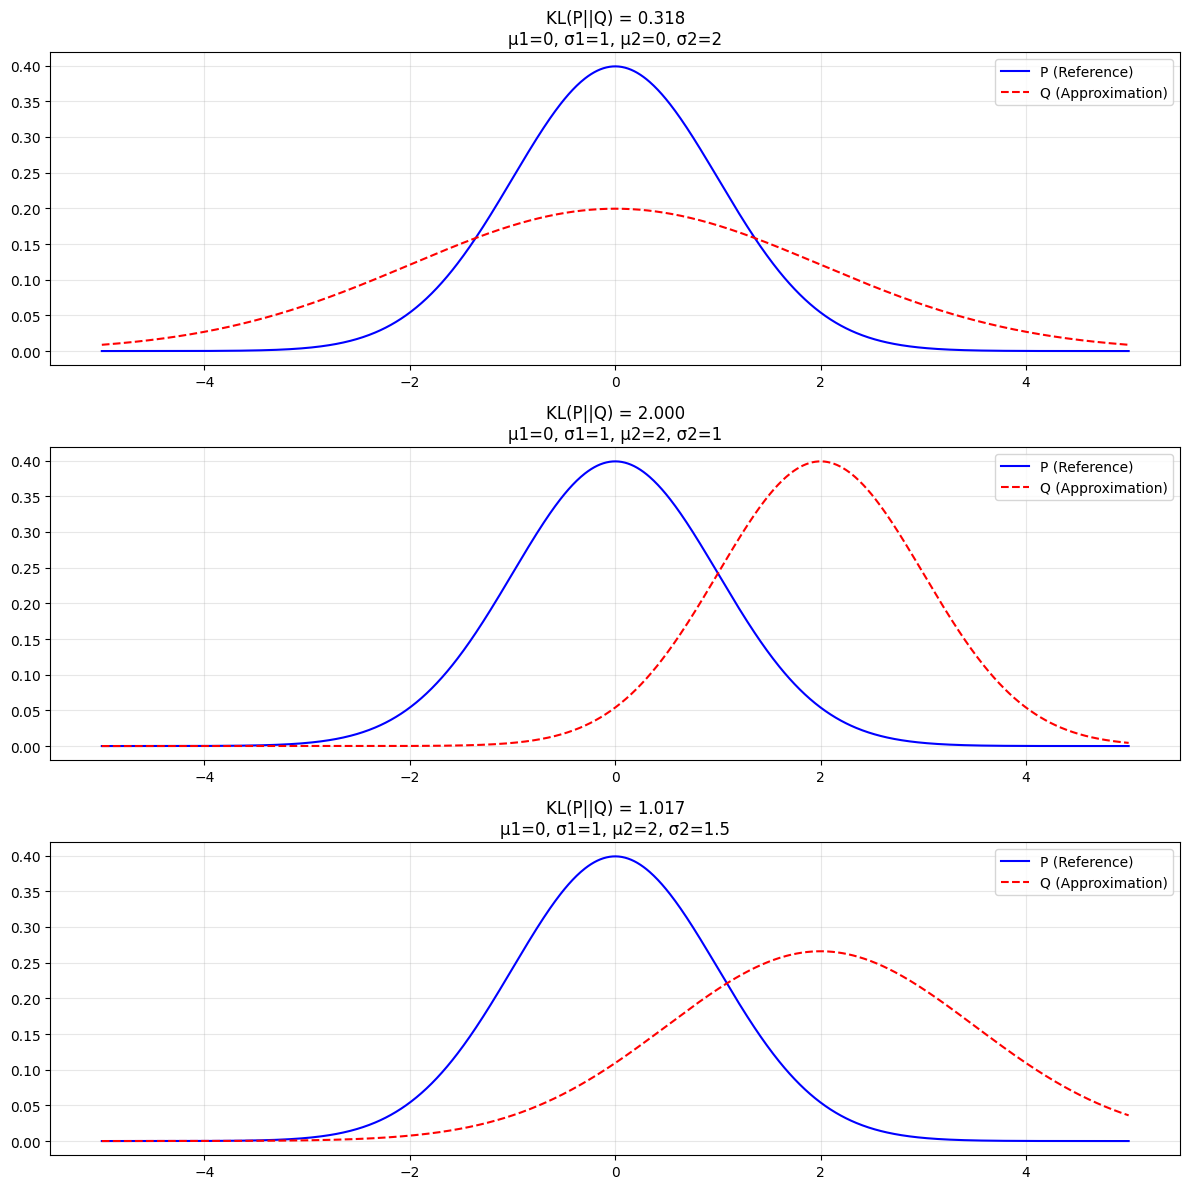

In [4]:
# Generate plots
plot_distributions_and_kl()

In [5]:
# Example with discrete distributions
P = np.array([0.2, 0.5, 0.3])  # True distribution
Q = np.array([0.1, 0.4, 0.5])  # Approximating distribution

kl_discrete = np.sum(rel_entr(P, Q))
print(f"KL divergence for discrete distributions: {kl_discrete:.4f}")

# Example with continuous normal distributions
mu1, sigma1 = 0, 1  # Distribution P
mu2, sigma2 = 2, 1.5  # Distribution Q

kl_continuous = kl_divergence_normal(mu1, sigma1, mu2, sigma2)
print(f"KL divergence for normal distributions: {kl_continuous:.4f}")

KL divergence for discrete distributions: 0.0970
KL divergence for normal distributions: 1.0166


# KL Divergence for Normal Distributions - Detailed Explanation

## 1. Starting Point (General Formula)
For continuous distributions, we start with:

$$D_{KL}(P||Q) = \int_{-\infty}^{\infty} p(x) \log\left(\frac{p(x)}{q(x)}\right)dx$$

## 2. For Normal Distributions
When P and Q are normal distributions:

$$p(x) = \frac{1}{\sigma_1\sqrt{2\pi}} e^{-\frac{(x-\mu_1)^2}{2\sigma_1^2}}$$
$$q(x) = \frac{1}{\sigma_2\sqrt{2\pi}} e^{-\frac{(x-\mu_2)^2}{2\sigma_2^2}}$$

## 3. Derivation Steps
Substituting these into the KL formula:

$$D_{KL}(P||Q) = \int_{-\infty}^{\infty} \frac{1}{\sigma_1\sqrt{2\pi}} e^{-\frac{(x-\mu_1)^2}{2\sigma_1^2}} \log\left(\frac{\frac{1}{\sigma_1\sqrt{2\pi}} e^{-\frac{(x-\mu_1)^2}{2\sigma_1^2}}}{\frac{1}{\sigma_2\sqrt{2\pi}} e^{-\frac{(x-\mu_2)^2}{2\sigma_2^2}}}\right)dx$$

After solving the integral (which involves several calculus steps), we get the closed form:

$$D_{KL}(P||Q) = \log\left(\frac{\sigma_2}{\sigma_1}\right) + \frac{\sigma_1^2 + (\mu_1-\mu_2)^2}{2\sigma_2^2} - \frac{1}{2}$$

# Derivation of KL Divergence for Normal Distributions

## 1. Initial Setup
Start with two normal distributions P and Q:

$$p(x) = \frac{1}{\sigma_1\sqrt{2\pi}} e^{-\frac{(x-\mu_1)^2}{2\sigma_1^2}}$$
$$q(x) = \frac{1}{\sigma_2\sqrt{2\pi}} e^{-\frac{(x-\mu_2)^2}{2\sigma_2^2}}$$

## 2. KL Divergence Formula

$$D_{KL}(P||Q) = \int_{-\infty}^{\infty} p(x) \log\left(\frac{p(x)}{q(x)}\right)dx$$

## 3. Expand the Logarithm
Using the property $\log(\frac{a}{b}) = \log(a) - \log(b)$:

$$D_{KL}(P||Q) = \int_{-\infty}^{\infty} p(x) [\log(p(x)) - \log(q(x))]dx$$

## 4. Substitute the Normal Distributions

$$\begin{align*}
D_{KL}(P||Q) = \int_{-\infty}^{\infty} & p(x) \Big[\log(\frac{1}{\sigma_1\sqrt{2\pi}}) - \frac{(x-\mu_1)^2}{2\sigma_1^2} \\
& - \log(\frac{1}{\sigma_2\sqrt{2\pi}}) + \frac{(x-\mu_2)^2}{2\sigma_2^2}\Big]dx
\end{align*}$$

## 5. Simplify the Logarithms

$$\begin{align*}
D_{KL}(P||Q) = \int_{-\infty}^{\infty} & p(x) \Big[\log(\frac{\sigma_2}{\sigma_1}) - \frac{(x-\mu_1)^2}{2\sigma_1^2} + \frac{(x-\mu_2)^2}{2\sigma_2^2}\Big]dx
\end{align*}$$

## 6. Split the Integral into Three Terms

$$D_{KL}(P||Q) = \log(\frac{\sigma_2}{\sigma_1})\int_{-\infty}^{\infty}p(x)dx - \int_{-\infty}^{\infty}p(x)\frac{(x-\mu_1)^2}{2\sigma_1^2}dx + \int_{-\infty}^{\infty}p(x)\frac{(x-\mu_2)^2}{2\sigma_2^2}dx$$

## 7. Solve Each Term
1. First term: $\int_{-\infty}^{\infty}p(x)dx = 1$ (property of PDF)

2. Second term: $\int_{-\infty}^{\infty}p(x)\frac{(x-\mu_1)^2}{2\sigma_1^2}dx = \frac{1}{2}$ (variance of normal distribution)

3. Third term: Expand $(x-\mu_2)^2$
   $$(x-\mu_2)^2 = (x-\mu_1+\mu_1-\mu_2)^2 = (x-\mu_1)^2 + 2(x-\mu_1)(\mu_1-\mu_2) + (\mu_1-\mu_2)^2$$
   
   When integrated with $p(x)$:
   - $E[(x-\mu_1)^2] = \sigma_1^2$
   - $E[x-\mu_1] = 0$
   - The constant term remains

## 8. Final Result
After combining all terms:

$$D_{KL}(P||Q) = \log(\frac{\sigma_2}{\sigma_1}) + \frac{\sigma_1^2 + (\mu_1-\mu_2)^2}{2\sigma_2^2} - \frac{1}{2}$$

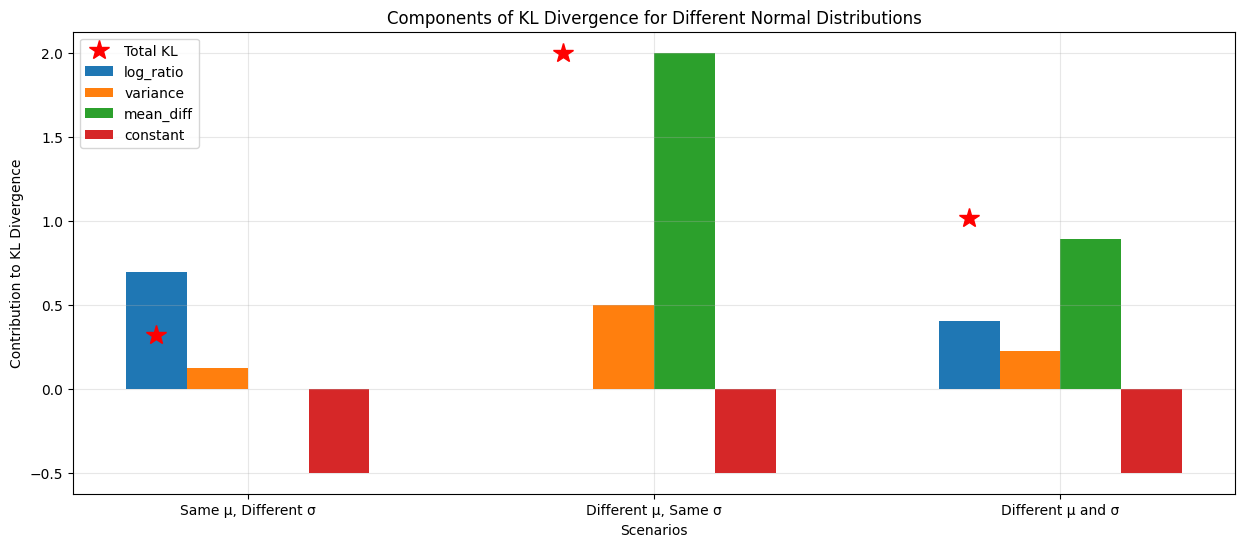


Scenario: Same μ, Different σ
Log ratio term: 0.6931
Variance term: 0.1250
Mean difference term: 0.0000
Constant term: -0.5000
Total KL divergence: 0.3181

Scenario: Different μ, Same σ
Log ratio term: 0.0000
Variance term: 0.5000
Mean difference term: 2.0000
Constant term: -0.5000
Total KL divergence: 2.0000

Scenario: Different μ and σ
Log ratio term: 0.4055
Variance term: 0.2222
Mean difference term: 0.8889
Constant term: -0.5000
Total KL divergence: 1.0166


In [6]:
def kl_divergence_normal_terms(mu1, sigma1, mu2, sigma2):
    """
    Compute KL divergence terms separately between two normal distributions
    """
    term1 = np.log(sigma2/sigma1)  # Log ratio of standard deviations
    term2 = (sigma1**2)/(2*sigma2**2)  # Variance term
    term3 = (mu1-mu2)**2/(2*sigma2**2)  # Mean difference term
    term4 = -0.5  # Constant term
    
    total = term1 + term2 + term3 + term4
    
    return {
        'log_ratio': term1,
        'variance': term2,
        'mean_diff': term3,
        'constant': term4,
        'total': total
    }

# Create examples with different parameters
scenarios = [
    {'name': 'Same μ, Different σ', 'mu1': 0, 'sigma1': 1, 'mu2': 0, 'sigma2': 2},
    {'name': 'Different μ, Same σ', 'mu1': 0, 'sigma1': 1, 'mu2': 2, 'sigma2': 1},
    {'name': 'Different μ and σ', 'mu1': 0, 'sigma1': 1, 'mu2': 2, 'sigma2': 1.5}
]

# Calculate KL terms for each scenario
results = []
for scenario in scenarios:
    terms = kl_divergence_normal_terms(
        scenario['mu1'], scenario['sigma1'],
        scenario['mu2'], scenario['sigma2']
    )
    terms['scenario'] = scenario['name']
    results.append(terms)

# Plotting
plt.figure(figsize=(15, 6))

# Plot distributions and their contributions
terms = ['log_ratio', 'variance', 'mean_diff', 'constant']
x = np.arange(len(scenarios))
width = 0.15
multiplier = 0

for term in terms:
    offset = width * multiplier
    plt.bar(x + offset, [result[term] for result in results], width, label=term)
    multiplier += 1

# Add total KL divergence
plt.plot(x, [result['total'] for result in results], 'r*', label='Total KL', markersize=15)

plt.xlabel('Scenarios')
plt.ylabel('Contribution to KL Divergence')
plt.title('Components of KL Divergence for Different Normal Distributions')
plt.xticks(x + width*1.5, [result['scenario'] for result in results])
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.show()

# Print numerical results
for result in results:
    print(f"\nScenario: {result['scenario']}")
    print(f"Log ratio term: {result['log_ratio']:.4f}")
    print(f"Variance term: {result['variance']:.4f}")
    print(f"Mean difference term: {result['mean_diff']:.4f}")
    print(f"Constant term: {result['constant']:.4f}")
    print(f"Total KL divergence: {result['total']:.4f}")